In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [3]:
#Loading files into python
species = pd.read_csv('species_info.csv')
print(species.head(1))

park_obs = pd.read_csv('observations.csv')
print(park_obs.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   

  conservation_status  
0                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
#information about data
print(species.info())
print(species.describe())
print(park_obs.info())
print(park_obs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data c

In [5]:
#Number of categories, species
print(species.category.unique())
print(species.conservation_status.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [8]:
species.fillna('No Intervention', inplace = True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [9]:
conservation_category = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
print(conservation_category)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0, 0.5, 'Number of Species')

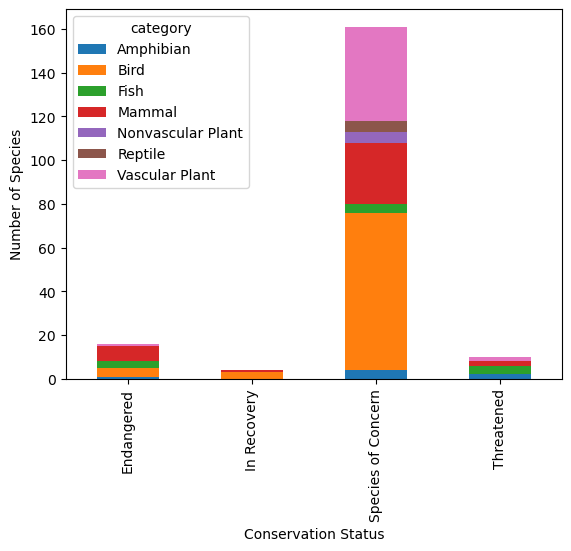

In [10]:
#plot stacked bar chart
ax = conservation_category.plot(kind = 'bar', stacked = True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

In [11]:
#plot pie chart for no intervention
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected'] = category_counts.protected/ (category_counts.protected + category_counts.not_protected) * 100
print(category_counts)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


                             park_name  species_count
0                  Bryce National Park         576025
1  Great Smoky Mountains National Park         431820
2            Yellowstone National Park        1443562
3               Yosemite National Park         863332


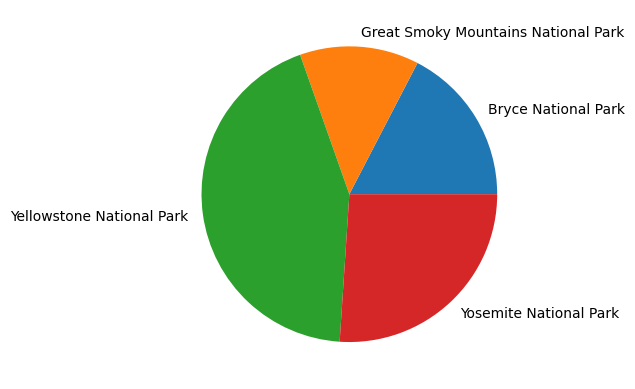

In [12]:
#group parks with observations
park_count = park_obs.groupby('park_name')['observations'].sum().reset_index()
park_count.columns = ['park_name', 'species_count']
print(park_count)
plt.pie(park_count.species_count, labels = park_count.park_name)
plt.show()

In [48]:
#Merging both CSV tables
species_park_join = park_obs.merge(species, on = 'scientific_name')
common_word = ['National Park']
species_park_join['park_name'] = species_park_join['park_name'].str.replace('|'.join(common_word), "")
species_park_join['is_protected'] = np.where(species_park_join.conservation_status != 'No Intervention', 'Protected', 'Not Protected')
print(species_park_join.head())

      scientific_name               park_name  observations        category  \
0  Vicia benghalensis  Great Smoky Mountains             68  Vascular Plant   
1  Vicia benghalensis               Yosemite            148  Vascular Plant   
2  Vicia benghalensis            Yellowstone            247  Vascular Plant   
3  Vicia benghalensis                  Bryce            104  Vascular Plant   
4      Neovison vison  Great Smoky Mountains             77          Mammal   

                         common_names conservation_status   is_protected  
0  Purple Vetch, Reddish Tufted Vetch     No Intervention  Not Protected  
1  Purple Vetch, Reddish Tufted Vetch     No Intervention  Not Protected  
2  Purple Vetch, Reddish Tufted Vetch     No Intervention  Not Protected  
3  Purple Vetch, Reddish Tufted Vetch     No Intervention  Not Protected  
4                       American Mink     No Intervention  Not Protected  


category                Amphibian    Bird   Fish  Mammal  Nonvascular Plant  \
park_name                                                                     
Bryce                        7542   58590  12823   28830              32992   
Great Smoky Mountains        5876   42869   9482   21056              24857   
Yellowstone                 19937  144300  31459   70701              83021   
Yosemite                    11713   86612  19137   42533              49783   

category                Reptile  
park_name                        
Bryce                      8141  
Great Smoky Mountains      5841  
Yellowstone               20061  
Yosemite                  11779  
category                Vascular Plant
park_name                             
Bryce                           484373
Great Smoky Mountains           364882
Yellowstone                    1218162
Yosemite                        727895


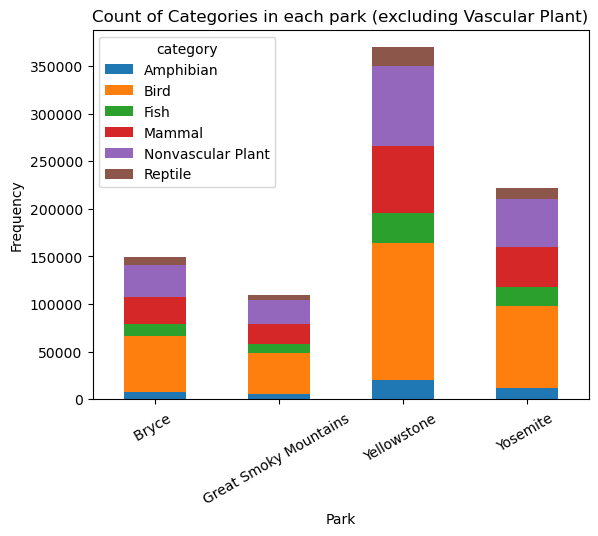

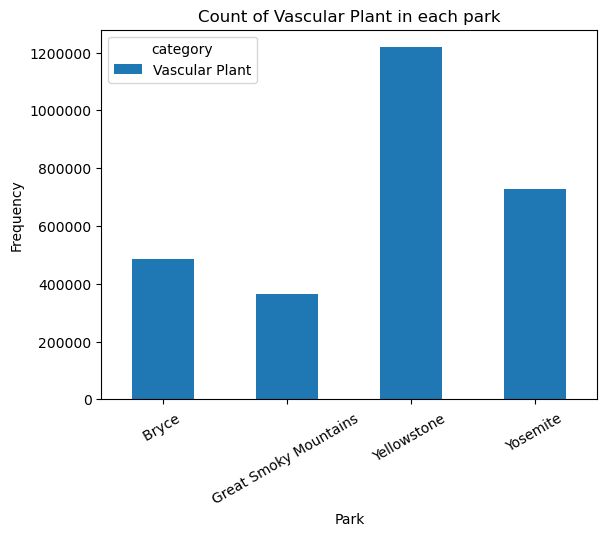

In [17]:
#Categories in each park without vascular plants and vascular shown separately
park_category_novas = species_park_join[species_park_join.category != 'Vascular Plant'].groupby(['park_name', 'category'])['observations'].sum().unstack()
print(park_category_novas)
ax1 = park_category_novas.plot(kind = 'bar', stacked = True, rot = 30)
ax1.set_xlabel('Park')
ax1.set_ylabel('Frequency')
ax1.set_title('Count of Categories in each park (excluding Vascular Plant)')

park_category_vas = species_park_join[species_park_join.category == 'Vascular Plant'].groupby(['park_name', 'category'])['observations'].sum().unstack()
print(park_category_vas)
ax2 = park_category_vas.plot(kind = 'bar', stacked = True, rot = 30)
ax2.set_xlabel('Park')
ax2.set_ylabel('Frequency')
plt.ticklabel_format(style='plain', axis = 'y')
ax2.set_title('Count of Vascular Plant in each park')
plt.show()

In [49]:
# Investigate lizards in detail
species_park_join['is_lizard'] = species_park_join.common_names.apply(lambda x: 'Lizard' in x) 
lizard_data = species_park_join[(species_park_join.is_lizard == True)].reset_index()
print(lizard_data.head())

   index               scientific_name               park_name  observations  \
0   4120  Elgaria multicarinata webbii                  Bryce             72   
1   4121  Elgaria multicarinata webbii  Great Smoky Mountains             70   
2   4122  Elgaria multicarinata webbii               Yosemite            157   
3   4123  Elgaria multicarinata webbii            Yellowstone            232   
4   5040       Sceloporus occidentalis               Yosemite            134   

  category                           common_names conservation_status  \
0  Reptile  San Diego (Southern) Alligator Lizard     No Intervention   
1  Reptile  San Diego (Southern) Alligator Lizard     No Intervention   
2  Reptile  San Diego (Southern) Alligator Lizard     No Intervention   
3  Reptile  San Diego (Southern) Alligator Lizard     No Intervention   
4  Reptile                   Western Fence Lizard     No Intervention   

    is_protected  is_lizard  
0  Not Protected       True  
1  Not Protected    

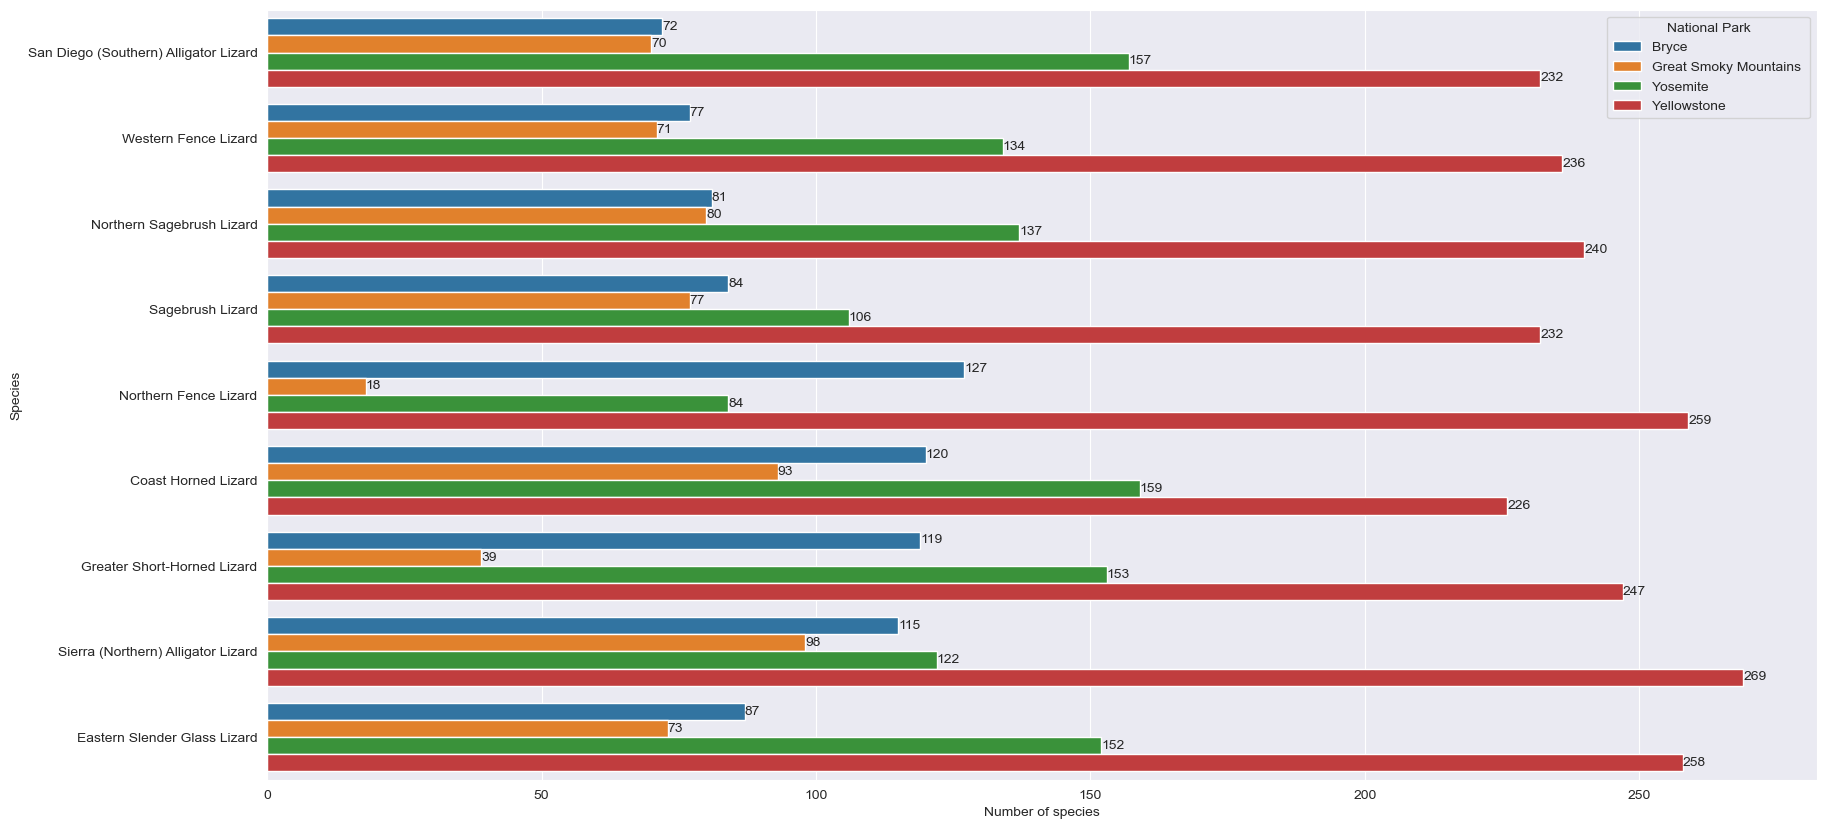

In [29]:
# Visualize lizards count species wise and park wise
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,10))
ax = plt.subplot()
sns.barplot(data = lizard_data, y = 'common_names', x = 'observations', hue = 'park_name')
plt.xlabel('Number of species')
plt.ylabel('Species')
plt.legend(title = 'National Park')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

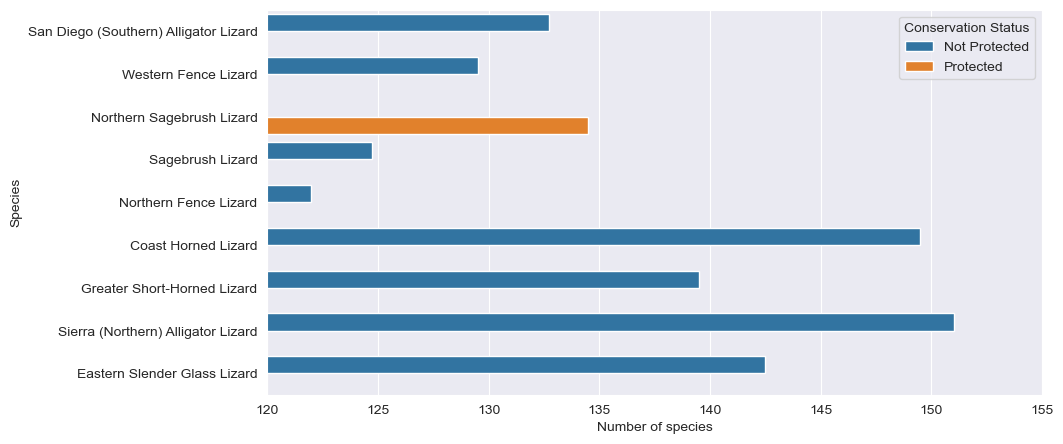

In [57]:
# Visualize endangered lizards
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,5))
sns.barplot(data = lizard_data, y = 'common_names', x = 'observations', hue = 'is_protected', ci = None)
plt.xlabel('Number of species')
plt.ylabel('Species', loc = 'center')
plt.legend(title = 'Conservation Status')
plt.xlim(120,155)
plt.show()